In [1]:
import pandas as pd
import numpy as np
from copy import deepcopy
import os
import sys
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

from pydmd import DMD

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fpath = "../../DMD_gene/data/raw_data/2015_tpm.csv"
df = pd.read_csv(fpath)
print(f"{df.shape=}")
df.head()

df.shape=(346230, 7)


,gene_name,time_id,tpm,time_point,replicate,control,hours
0,A1BG,S1a,0.204405,0,r1c,control,0
1,A1CF,S1a,0.000000,0,r1c,control,0
2,A2M,S1a,0.000000,0,r1c,control,0
3,A2ML1,S1a,0.000000,0,r1c,control,0
4,A3GALT2,S1a,0.000000,0,r1c,control,0


In [3]:
query = "CD34"

pdf = df[df['gene_name'] == query]
pdf['date'] = '2015'
pdf

/tmp/ipykernel_3288441/2410203401.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf['date'] = '2015'


,gene_name,time_id,tpm,time_point,replicate,control,hours,date
2583,CD34,S1a,0.00000,0,r1c,control,0,2015
21818,CD34,S1b,0.00000,0,r2c,control,0,2015
41053,CD34,S2a,0.00371,0,r1,timecourse,0,2015
60288,CD34,S2b,0.00000,0,r2,timecourse,0,2015
79523,CD34,S3a,0.00000,1,r1,timecourse,8,2015
98758,CD34,S3b,0.00000,1,r2,timecourse,8,2015
117993,CD34,S4a,0.00000,2,r1,timecourse,16,2015
137228,CD34,S4b,0.00000,2,r2,timecourse,16,2015
156463,CD34,S5a,0.00000,3,r1,timecourse,24,2015
175698,CD34,S5b,0.00000,3,r2,timecourse,24,2015


In [4]:
fpath = "../../DMD_gene/data/raw_data/2018_tpm.csv"
df = pd.read_csv(fpath)
print(f"{df.shape=}")
df.head()

df.shape=(923280, 7)


,gene_name,time_id,tpm,time_point,replicate,hours,control
0,A1BG,D1_T1R1,0.126512,1,1,-48,control
1,A1BG,D1_T2R1,0.179995,2,1,0,timecourse
2,A1BG,D1_T3R1,0.068018,3,1,8,timecourse
3,A1BG,D2_T1R1,0.104575,1,1,16,timecourse
4,A1BG,D2_T2R1,0.196855,2,1,24,timecourse


In [5]:
query = "CD34"

pdf2 = df[df['gene_name'] == query]
pdf2['date'] = '2018'
pdf2

/tmp/ipykernel_3288441/1873490143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf2['date'] = '2018'


,gene_name,time_id,tpm,time_point,replicate,hours,control,date
123984,CD34,D1_T1R1,0.008642,1,1,-48,control,2018
123985,CD34,D1_T2R1,0.081340,2,1,0,timecourse,2018
123986,CD34,D1_T3R1,0.024781,3,1,8,timecourse,2018
123987,CD34,D2_T1R1,0.069394,1,1,16,timecourse,2018
123988,CD34,D2_T2R1,0.074477,2,1,24,timecourse,2018
123989,CD34,D2_T3R1,0.009592,3,1,32,timecourse,2018
123990,CD34,D3_T1R1,0.209832,1,1,40,timecourse,2018
123991,CD34,D3_T2R1,0.108241,2,1,48,timecourse,2018
123992,CD34,D3_T3R1,0.085580,3,1,56,timecourse,2018
123993,CD34,D4_T1R1,0.098492,1,1,64,timecourse,2018


In [6]:
pdf3 = pd.concat([pdf, pdf2])
pdf3.head()

,gene_name,time_id,tpm,time_point,replicate,control,hours,date
2583,CD34,S1a,0.00000,0,r1c,control,0,2015
21818,CD34,S1b,0.00000,0,r2c,control,0,2015
41053,CD34,S2a,0.00371,0,r1,timecourse,0,2015
60288,CD34,S2b,0.00000,0,r2,timecourse,0,2015
79523,CD34,S3a,0.00000,1,r1,timecourse,8,2015


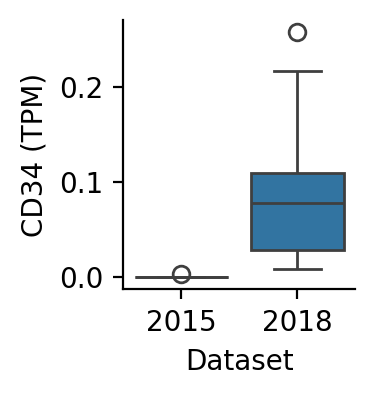

In [15]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 1.5, 1.75

sns.boxplot(data=pdf3, 
            x='date',
            y='tpm')

plt.ylabel('CD34 (TPM)')
plt.xlabel('Dataset')
sns.despine()

# Publically available data

In [17]:
fpath = "/nfs/turbo/umms-indikar/shared/projects/public_data/bj_fibroblast/GSM2988896_BJ-fibroblasts-geneExpr.txt"

df = pd.read_csv(fpath, sep='\t')

df.head()

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM
0,ENSG00000000003,"ENST00000373020,ENST00000494424,ENST0000049677...",2189.50,2023.24,279.0,19.13,13.35
1,ENSG00000000005,"ENST00000373031,ENST00000485971",940.50,774.26,0.0,0.00,0.00
2,ENSG00000000419,"ENST00000371582,ENST00000371584,ENST0000037158...",1075.00,908.74,229.0,34.95,24.39
3,ENSG00000000457,"ENST00000367770,ENST00000367771,ENST0000036777...",3556.82,3390.56,110.0,4.50,3.14
4,ENSG00000000460,"ENST00000286031,ENST00000359326,ENST0000041381...",2414.09,2247.84,62.0,3.83,2.67


In [18]:
query = "ENSG00000174059"
pdf = df[df['gene_id'] == query]
pdf

,gene_id,transcript_id(s),length,effective_length,expected_count,TPM,FPKM
13638,ENSG00000174059,"ENST00000310833,ENST00000356522,ENST0000036703...",3363.5,3197.24,19.0,0.82,0.58
